In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') ## Importing libraries

In [255]:
df = pd.read_csv('/content/anime.csv')

In [256]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [257]:
df.shape

(12294, 7)

In [258]:
df.isna().sum() # Check for missing values

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [259]:
df.duplicated().sum() #CHECKING DUPLICATE VALUES

np.int64(0)

In [260]:
df['rating'] = df['rating'].fillna(df['rating'].mean())   # Fill missing ratings with average

In [261]:
df.dropna(inplace=True) # dropping null values as it is less than 3%

In [262]:
df.isna().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [263]:
df.shape

(12210, 7)

In [264]:
df.dtypes

,0
anime_id,int64
name,object
genre,object
type,object
episodes,object
rating,float64
members,int64


In [265]:
df['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

In [266]:
df['genre'].unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Action, Comedy, Hentai, Romance, Supernatural',
       'Hentai, Sports', 'Hentai, Slice of Life'], dtype=object)

In [267]:
df.genre.value_counts()

,count
genre,
Hentai,823
Comedy,523
Music,300
Kids,199
"Comedy, Slice of Life",179
...,...
"Action, Ecchi, Fantasy, Harem, Military, Romance, Supernatural",1
"Action, Adventure, Historical, Samurai, Seinen",1
"Drama, Fantasy, Psychological, Supernatural",1


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12210 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12210 non-null  int64  
 1   name      12210 non-null  object 
 2   genre     12210 non-null  object 
 3   type      12210 non-null  object 
 4   episodes  12210 non-null  object 
 5   rating    12210 non-null  float64
 6   members   12210 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 763.1+ KB


In [269]:
df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [270]:
df['episodes'].replace('Unknown',None, inplace=True)

In [271]:
pd.to_numeric(df['episodes'])

,episodes
0,1.0
1,64.0
2,51.0
3,24.0
4,51.0
...,...
12289,1.0
12290,1.0
12291,4.0
12292,1.0


In [272]:
df['episodes']=pd.to_numeric(df['episodes']) #coverting episodes from object to float

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12210 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12210 non-null  int64  
 1   name      12210 non-null  object 
 2   genre     12210 non-null  object 
 3   type      12210 non-null  object 
 4   episodes  11903 non-null  float64
 5   rating    12210 non-null  float64
 6   members   12210 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 763.1+ KB


In [274]:
df.describe()

,anime_id,episodes,rating,members
count,12210.000000,11903.000000,12210.000000,1.221000e+04
mean,13936.486486,12.426279,6.478195,1.817871e+04
std,11398.045316,46.959892,1.015732,5.498978e+04
min,1.000000,1.000000,1.670000,5.000000e+00
25%,3460.250000,1.000000,5.900000,2.290000e+02
50%,10168.500000,2.000000,6.550000,1.571000e+03
75%,24442.500000,12.000000,7.170000,9.530000e+03
max,34527.000000,1818.000000,10.000000,1.013917e+06


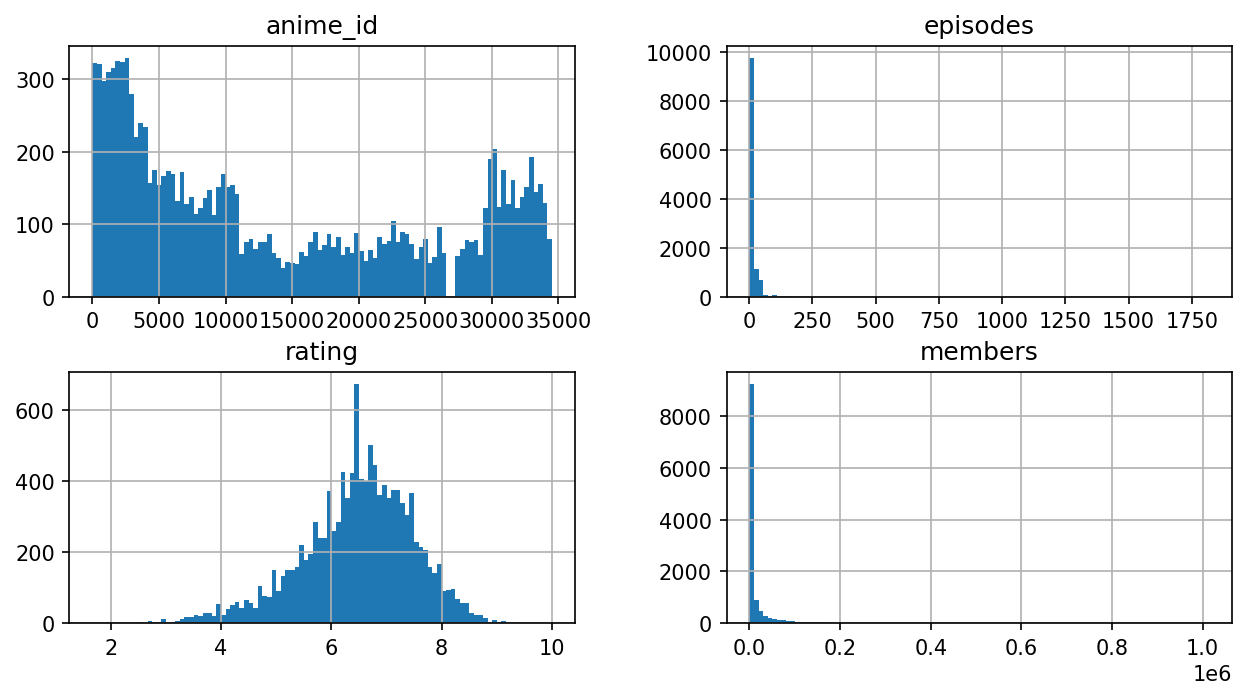

In [275]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=150
df.hist(bins=100)
plt.show()

In [276]:
df.describe(include='object')


,name,genre,type
count,12210,12210,12210
unique,12208,3260,6
top,Shi Wan Ge Leng Xiaohua,Hentai,TV
freq,2,823,3777


In [277]:
df.type.value_counts()

,count
type,
TV,3777
OVA,3310
Movie,2306
Special,1674
ONA,655
Music,488


<Axes: xlabel='count', ylabel='type'>

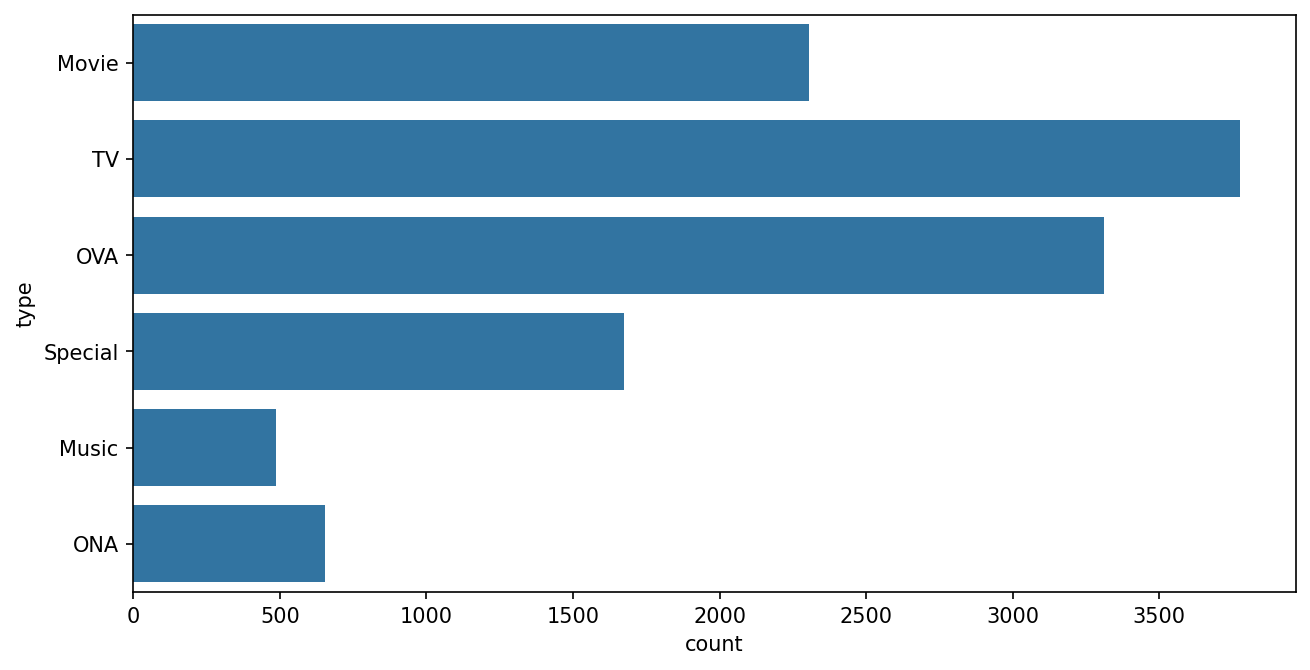

In [278]:
sns.countplot(y='type',data=df)


In [279]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266


In [280]:
## Feature Extraction

from sklearn.preprocessing import OneHotEncoder,MinMaxScaler

In [281]:
genres=df['genre'].str.get_dummies(sep=',')
df_numerical = pd.concat([df.drop('genre', axis=1), genres], axis=1) #Converting categorical feature "genre" into numerical using One hot Encoding

In [282]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['rating', 'members']
df_numerical[numerical_cols] = scaler.fit_transform(df_numerical[numerical_cols])

In [283]:
df_numerical.head() # standardization

,anime_id,name,type,episodes,rating,members,Adventure,Cars,Comedy,Dementia,...,Shoujo,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi
0,32281,Kimi no Na wa.,Movie,1.0,2.847132,3.318049,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,2.738831,14.102949,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51.0,2.728986,1.747365,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24.0,2.650222,11.918944,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9969,Gintama&#039;,TV,51.0,2.640376,2.420318,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [284]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation
from sklearn.metrics.pairwise import cosine_similarity

In [285]:

def recommend_similar_anime(data, target_anime, threshold=0.5):
    data['episodes'] = pd.to_numeric(data['episodes'], errors='coerce')
    data = data.dropna(subset=['episodes'])

    # Extract features for similarity computation
    features = data.drop(['name', 'type'], axis=1)

    # Find the target anime's features
    target_row = features[df['name'] == target_anime]

    if target_row.empty:
        return f"Anime '{target_anime}' not found in the dataset."

    similarities = cosine_similarity(target_row, features).flatten()


    similar_indices = np.where((similarities > threshold) & (data['name'] != target_anime))[0] #get index of similar anime leaving the target anime

    recommended_anime = data.iloc[similar_indices]['name'].tolist() #return list of recommended animes

    return recommended_anime

In [286]:
recommendations = recommend_similar_anime(df_numerical, 'Nana', threshold=0.5)
recommendations_series = pd.Series(recommendations)
top_5_recommendations = recommendations_series.value_counts().head(5)
print(top_5_recommendations)

Shi Wan Ge Leng Xiaohua                 2
Saru Kani Gassen                        2
Memory of Red                           1
Ninjutsu Hinotama Kozou: Edo no Maki    1
Requiem (ONA)                           1
Name: count, dtype: int64


In [287]:
## Evaluation


df_numerical['liked'] = ((df_numerical['rating'] >= 1)).astype(int)
df_numerical.head()

,anime_id,name,type,episodes,rating,members,Adventure,Cars,Comedy,Dementia,...,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,liked
0,32281,Kimi no Na wa.,Movie,1.0,2.847132,3.318049,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,2.738831,14.102949,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,TV,51.0,2.728986,1.747365,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,TV,24.0,2.650222,11.918944,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9969,Gintama&#039;,TV,51.0,2.640376,2.420318,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [288]:
df_numerical.isnull().sum()

,0
anime_id,0
name,0
type,0
episodes,307
rating,0
...,...
Supernatural,0
Thriller,0
Vampire,0
Yaoi,0


In [289]:
df1=df_numerical.dropna()

In [290]:
df1.isnull().sum()

,0
anime_id,0
name,0
type,0
episodes,0
rating,0
...,...
Supernatural,0
Thriller,0
Vampire,0
Yaoi,0


In [291]:
print(df1['liked'].value_counts())

liked
0    10165
1     1738
Name: count, dtype: int64


In [292]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df1.drop(['name', 'type','anime_id'], axis=1)
y = df1['liked']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = LogisticRegression()
model.fit(X_train, y_train)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape) # spilitting data into training and testing

Shape of X_train: (9522, 86)
Shape of X_test: (2381, 86)
Shape of y_train: (9522,)
Shape of y_test: (2381,)


In [293]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred) # Calculating accuracy
print("Accuracy:", accuracy)

Accuracy: 1.0


In [294]:
from sklearn.metrics import precision_score, recall_score, f1_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


Precision: 1.0 (all predicted positives are actual positives)

Recall: 1.0 (all actual positives are predicted)

F1-score: 1.0 (perfect balance between precision and recall)

Accuracy: 1.0 (all predictions are correct)

In [295]:
## Interview Questions

1.

* User-Based Collaborative Filtering:
This method finds users who are similar to the target user based on their preferences or ratings. Then, it recommends items that those similar users liked, but the target user hasn't seen yet.

 Example:
If you and another user both liked "Naruto" and "One Piece", and that user also liked "Attack on Titan", the system may recommend "Attack on Titan" to you.

* Item-Based Collaborative Filtering:
This method focuses on similarities between items instead of users. It finds items that are similar to the ones the user has already liked or rated highly, and recommends those.

 Example:
If you liked "Naruto", and many users who liked "Naruto" also liked "Bleach", the system will recommend "Bleach" to you.

 Key Difference:

 User-based looks for similar users to recommend their favorite items.

 Item-based looks for similar items to the ones you liked and recommends those.


 2. Collaborative filtering is a recommendation method that suggests items based on user behavior. It finds users with similar tastes or items that get similar ratings, and recommends accordingly—without needing the content of the items.

In [296]:
## Done